In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
train_data = pd.read_csv("ICT_Morning.csv", header=1)
test_data = pd.read_csv("ICT_Afternoon.csv", header=1)

In [3]:
print("Training Data Preview:")
print(train_data.head())
print(train_data.info())

Training Data Preview:
  Unnamed: 0 Unnamed: 1 Unnamed: 2    Q1    Q2   A1    Q3    Q4  Midterm  \
0       Sr#.   Roll No.       Name  30.0  49.0  100  30.0  15.0    35.00   
1          1         S1         N1  24.0  34.0  100  29.0  10.0    32.38   
2          2         S2         N2  24.0  25.5  100  26.0   6.5    26.25   
3          3         S3         N3  27.0  34.5  100  29.0   7.0    31.50   
4          4         S4         N4  25.0  23.0  100  28.0   4.5    23.63   

     Q5     A2    Q6    Q7    Q8  Final  Total  
0  45.0  100.0  32.0  24.0  40.0  40.00    100  
1  36.0  100.0  21.0   9.0  32.0  31.67     84  
2  23.5  100.0  15.0   9.0  25.0  30.00     73  
3  37.0  100.0  26.0  12.0  33.0  34.00     86  
4  35.0  100.0  18.0  11.0  26.0  28.67     70  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  55 non-null     object 


In [5]:
train_data.columns = [
    "Sr_No", "Roll_Number", "Name", "Q1", "Q2", "A1", "Q3", "Q4", "Midterm", "Q5", "A2", "Q6", "Q7", "Q8", "Final", "Total"
]
test_data.columns = [
    "Sr_No", "Roll_Number", "Name","Q1", "Q2", "A1", "Q3", "Q4", "Midterm", "Q5", "A2", "Q6", "Q7", "Q8", "Final", "Total"
]

In [6]:
# Drop irrelevant columns
train_data.drop(columns=['Sr_No', 'Roll_Number', 'Name'], inplace=True)
test_data.drop(columns=['Sr_No', 'Roll_Number', 'Name'], inplace=True)

In [7]:
# Convert numeric columns to the correct type (coerce errors to NaN)
numeric_columns = ['Q1', 'Q2', 'A1', 'Q3', 'Q4', 'Midterm', 'Q5', 'A2', 'Q6', 'Q7', 'Q8', 'Final']
train_data[numeric_columns] = train_data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [8]:
# Fill missing values with the mean of each column for numeric features
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

In [9]:
# Fill missing values for non-numeric columns with a placeholder value
non_numeric_columns = train_data.select_dtypes(exclude=['number']).columns
train_data[non_numeric_columns] = train_data[non_numeric_columns].fillna('Unknown')

In [10]:
# Fill missing values in test_data (same process)
test_data[numeric_columns] = test_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
test_data[numeric_columns] = test_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[non_numeric_columns] = test_data[non_numeric_columns].fillna('Unknown')


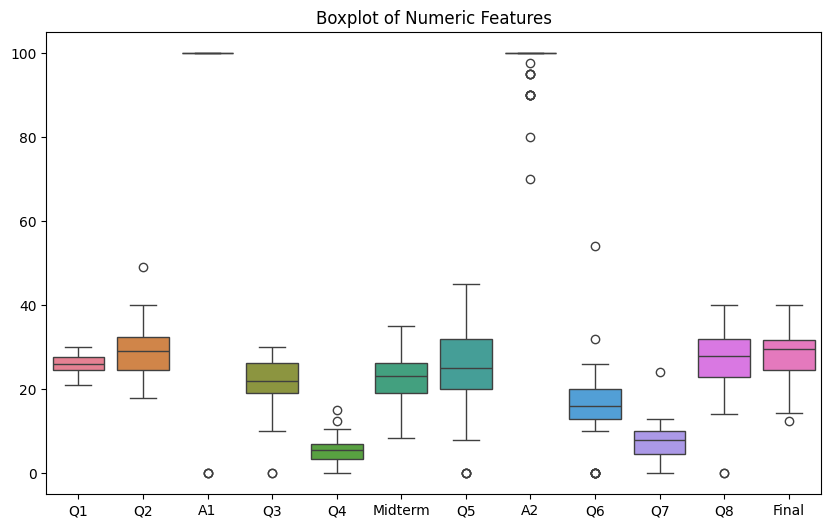

In [11]:
# Visualize outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[numeric_columns])
plt.title('Boxplot of Numeric Features')
plt.show()

In [12]:
# Scaling the numeric features
scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

In [13]:
# Define features (X) and target (y)
X_train = train_data.drop(columns='Final')  # Features for training
y_train = train_data['Final']  # Target for training
X_test = test_data.drop(columns='Final')  # Features for testing
y_test = test_data['Final']  # Target for testing


In [14]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Added random_state for reproducibility
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluate model performance
print("NaN values in y_test:", y_test.isna().sum())
print("NaN values in y_pred:", np.isnan(y_pred).sum())


NaN values in y_test: 0
NaN values in y_pred: 0


In [17]:
# Remove rows with NaN values if present
valid_indices = ~y_test.isna() & ~np.isnan(y_pred)
y_test_valid = y_test[valid_indices]
y_pred_valid = y_pred[valid_indices]

In [18]:
# Calculate and print performance metrics
mse = mean_squared_error(y_test_valid, y_pred_valid)
r2 = r2_score(y_test_valid, y_pred_valid)


In [19]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.837850347097572
R-squared: 0.5217857628160827


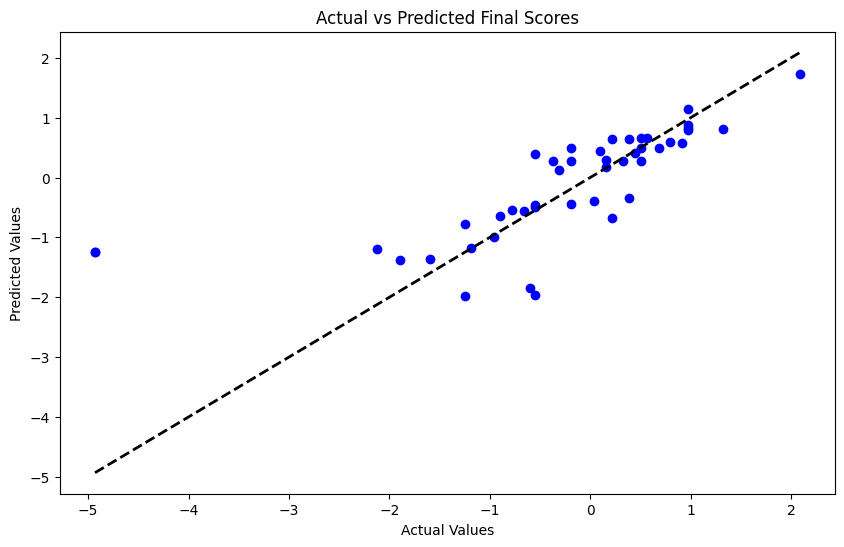

In [20]:
# Optionally, visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_valid, y_pred_valid, color='blue')
plt.plot([y_test_valid.min(), y_test_valid.max()], [y_test_valid.min(), y_test_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Final Scores')
plt.show()